# Summary

In [12]:
from sklearn.metrics import roc_auc_score
import pandas as pd
import seaborn as sns
X_test_split= pd.read_csv("x_test.csv")
y_test_split= pd.read_csv("y_test.csv")
y_test_split=y_test_split['0'].to_numpy()

In [13]:
import matplotlib.pyplot as plt
def plot_importance(model, features, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:10])
    plt.title(model)
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


In [14]:
from sklearn.ensemble import VotingClassifier
import joblib
lgbm_clf1 = joblib.load('LightGBM.joblib')
catboost = joblib.load("CatBoost.joblib")

## Most important features for each parameter


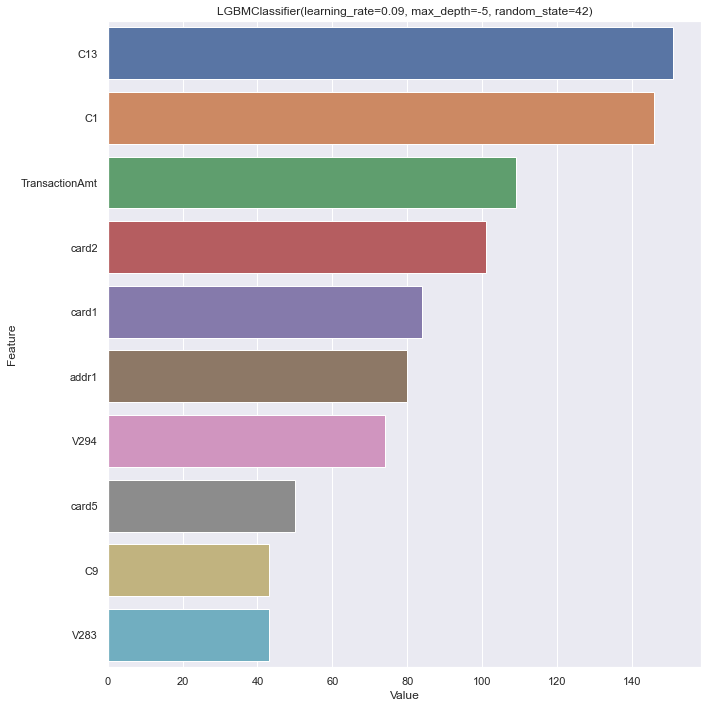

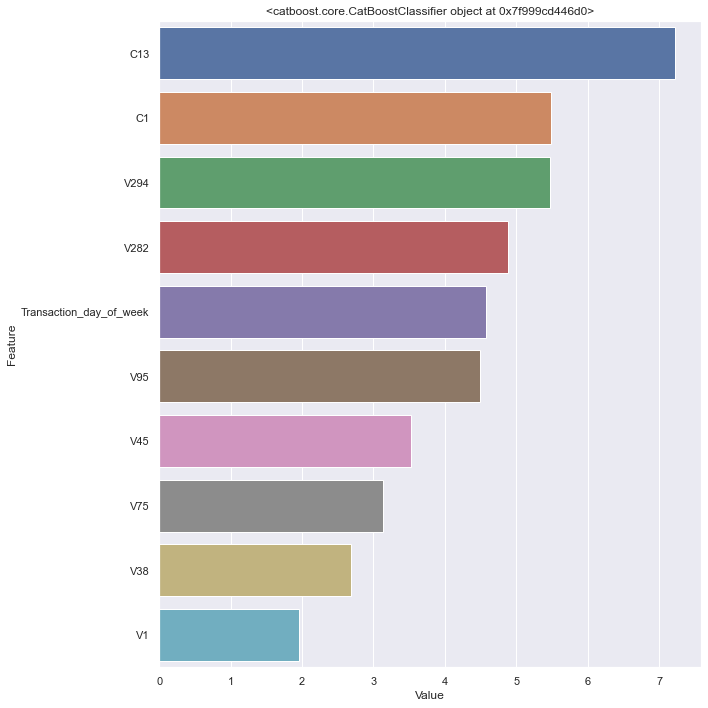

In [15]:
plot_importance(lgbm_clf1,X_test_split)
plot_importance(catboost,X_test_split)


## Scores obtained with each model

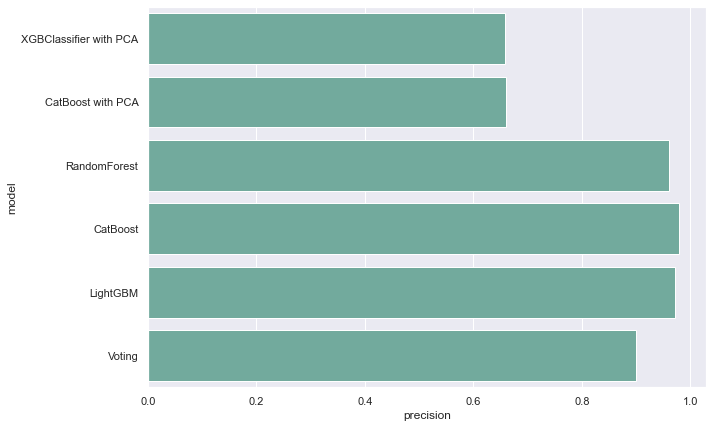

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

import pandas as pd
df = pd.DataFrame({
        'model': ['XGBClassifier with PCA','CatBoost with PCA','RandomForest','CatBoost', 'LightGBM',  'Voting'],
        'precision': [0.658403638078612,0.6599206464468752,0.9600065026956727,0.9795514635479674, 0.9708175375546141, 0.9]
})

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="precision", 
    y="model", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

## Evaluation on test set


In [17]:
y_pred_catboot=catboost.predict_proba(X_test_split)[:, 1]
print(roc_auc_score(y_test_split,y_pred_catboot))

0.9797861103296523
